In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
# Load data (deserialize)
with open('movesKen.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)


# Spliting into training, dev and test set using indexing
dataset_x = unserialized_data['dataset_x']
dataset_y = unserialized_data['dataset_y']
num_classes = np.unique(dataset_y).shape[0]
indexes = np.arange(dataset_x.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * dataset_x.shape[0])]
test_index  = indexes[int(0.9 * dataset_x.shape[0]) :]
train_x = dataset_x[train_index]
train_y = dataset_y[train_index]
test_x  = dataset_x[test_index]
test_y  = dataset_y[test_index]

In [4]:
# convert class vectors to binary class matrices
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y  = keras.utils.to_categorical(test_y,  num_classes)
print(train_y.shape)
print(test_y.shape)

(1196, 10, 4)
(133, 10, 4)


In [6]:
model = tf.keras.models.load_model('movesSF2.h5')

In [11]:
test_loss, test_acc = model.evaluate(test_x,  test_y, batch_size=1, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

133/133 - 28s - loss: 0.2866 - acc: 0.8857
Test loss: 0.2865573763847351
Test accuracy: 0.8857142925262451


In [116]:
# Get moves of name from indexing
def movesName(class_index):
    if   class_index == 0: return 'None'
    elif class_index == 1: return 'Hadoken'
    elif class_index == 2: return 'Shoryuken'
    elif class_index == 3: return 'Tatsumaki' # Tatsumaki Senpuu Kyaku

In [146]:
def predict(choice):
    result = model.predict(np.reshape(test_x[choice], (1, 10, 100, 100, 3)))

    # Displaying random choice of dataset
    plt.figure(figsize = (10,2))
    for i in range(test_x.shape[1]):
        img = test_x[choice][i]
        plt.subplot(1,test_x.shape[1],i+1)
        plt.gca().set_title(movesName(np.argmax(test_y[choice][i])))
        plt.imshow(img,  aspect='auto')
    plt.tight_layout()
    plt.show()
    return result

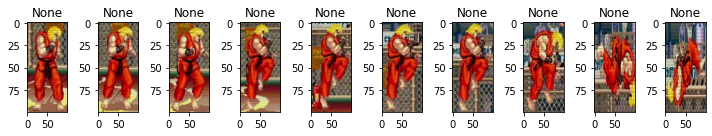

In [168]:
choice = np.random.choice(test_x.shape[0])
result = predict(choice)

In [195]:
np.set_printoptions(suppress=True)
# print(test_y[choice])
print("test_y:", np.argmax(test_y[choice], axis=-1))
print("result:", np.argmax(result, axis=-1).squeeze())
print( np.take(result.squeeze(), np.argmax(result, axis=-1).squeeze(), axis=-1))

#     max = np.argmax(result, axis=-1)
#     print(max)
#     print(np.take(result, max, axis=2))

# max = np.argmax(result, axis=-1)
# print(max.shape, result.shape)
# print(max)
# print(np.take(result, max))

# print()
# print(np.argmax(test_y[choice], axis=-1))
# 


test_y: [0 0 0 0 0 0 0 0 0 0]
result: [0 0 0 0 0 0 0 0 0 0]
[[1.       1.       1.       1.       1.       1.       1.       1.
  1.       1.      ]
 [0.998652 0.998652 0.998652 0.998652 0.998652 0.998652 0.998652 0.998652
  0.998652 0.998652]
 [0.993699 0.993699 0.993699 0.993699 0.993699 0.993699 0.993699 0.993699
  0.993699 0.993699]
 [0.978612 0.978612 0.978612 0.978612 0.978612 0.978612 0.978612 0.978612
  0.978612 0.978612]
 [0.981302 0.981302 0.981302 0.981302 0.981302 0.981302 0.981302 0.981302
  0.981302 0.981302]
 [0.971218 0.971218 0.971218 0.971218 0.971218 0.971218 0.971218 0.971218
  0.971218 0.971218]
 [0.966459 0.966459 0.966459 0.966459 0.966459 0.966459 0.966459 0.966459
  0.966459 0.966459]
 [0.961568 0.961568 0.961568 0.961568 0.961568 0.961568 0.961568 0.961568
  0.961568 0.961568]
 [0.946933 0.946933 0.946933 0.946933 0.946933 0.946933 0.946933 0.946933
  0.946933 0.946933]
 [0.911752 0.911752 0.911752 0.911752 0.911752 0.911752 0.911752 0.911752
  0.911752 0.9117